**Vehicle Detection Project**

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

### Histogram of Oriented Gradients (HOG)

#### 1. Explain how (and identify where in your code) you extracted HOG features from the training images.

The code for this step is contained in the first code cell of the IPython notebook (or in lines # through # of the file called `some_file.py`).  

I started by reading in all the `vehicle` and `non-vehicle` images.  Here is an example of one of each of the `vehicle` and `non-vehicle` classes:

![alt text][image1]

I then explored different color spaces and different `skimage.hog()` parameters (`orientations`, `pixels_per_cell`, and `cells_per_block`).  I grabbed random images from each of the two classes and displayed them to get a feel for what the `skimage.hog()` output looks like.

Here is an example using the `YCrCb` color space and HOG parameters of `orientations=8`, `pixels_per_cell=(8, 8)` and `cells_per_block=(2, 2)`:


![alt text][image2]

__Import libraries__

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import random

% matplotlib inline

__Import functions__

In [2]:
from helper_functions import data_look

__Initialization__

In [3]:
# Images are in PNG format and divided into vehichles and non-vehicles
vehicles_images = glob.glob('./training_dataset/vehicles/*/*.png')
non_vehicles_images = glob.glob('./training_dataset/non-vehicles/*/*.png')

vehicles_all = []
non_vehicles_all = []

__Reading all images__

In [4]:
for image in vehicles_images:
    vehicles_all.append(image)

for image in non_vehicles_images:
    non_vehicles_all.append(image)

# Shuffle image data
random.shuffle(vehicles_all)
random.shuffle(non_vehicles_all)

# Take the first 100 images for testing
vehicles_test = vehicles_all[:1000]
non_vehicles_test = non_vehicles_all[:1000]

# Store some characteristics of the dataset
data_info_test = data_look(vehicles_test, non_vehicles_test)

print('Your function returned a count of', 
      data_info_test["n_vehicles"], ' vehicles and', 
      data_info_test["n_non_vehicles"], ' non-vehicles')
print('of size: ',data_info_test["image_shape"], ' and data type:', 
      data_info_test["data_type"])

Your function returned a count of 1000  vehicles and 1000  non-vehicles
of size:  (64, 64, 3)  and data type: float32


__Plot one sample image from each classes__

Current random index is 230


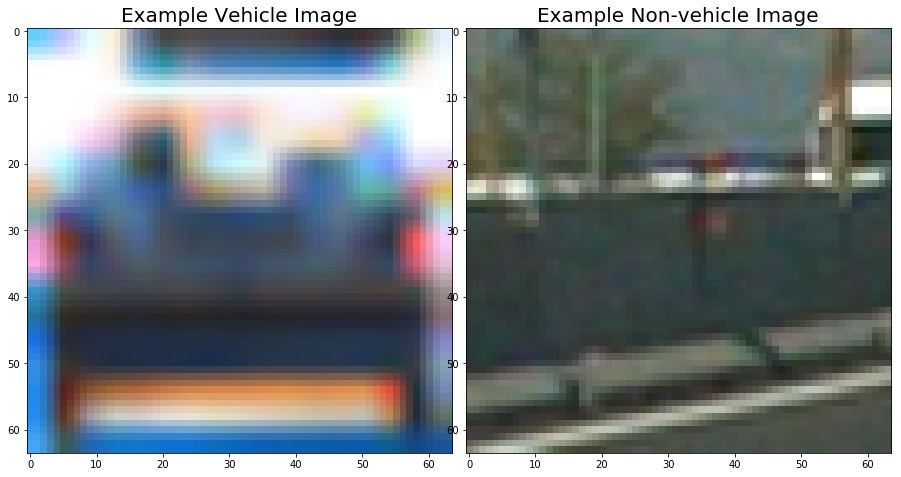

In [5]:
# Return a random index within range of the minimum length in both lists
idx_max = np.minimum(data_info_test["n_vehicles"], data_info_test["n_non_vehicles"])
idx_random = np.random.randint(0, idx_max)
print("Current random index is", idx_random)

# Read in vehicles / non-vehicles images
vehicle_image_test = mpimg.imread(vehicles_test[idx_random])
non_vehicle_image_test = mpimg.imread(non_vehicles_test[idx_random])

# Plot the examples
f, axs = plt.subplots(1, 2, figsize=(30, 15))
axs = axs.ravel()

axs[0].imshow(vehicle_image_test)
axs[0].set_title('Example Vehicle Image', fontsize = 20)

axs[1].imshow(non_vehicle_image_test)
axs[1].set_title('Example Non-vehicle Image', fontsize = 20)

f.tight_layout()
plt.subplots_adjust(left=0., right=0.4, top=0.9, bottom=0.)

__Apply HOG with different parameters__

__Import functions__

In [6]:
from helper_functions import get_hog_features

__Define parameters__

In [7]:
# Define HOG parameters
# First set
orient = 9
pix_per_cell = 8
cell_per_block = 2
vis = True
feature_vec = False

# Second set
orient_2 = 9
pix_per_cell_2 = 4
cell_per_block_2 = 2
vis_2 = True
feature_vec_2 = False

# Third set
orient_3 = 9
pix_per_cell_3 = 16
cell_per_block_3 = 2
vis_3 = True
feature_vec_3 = False

__Covert to grayscale__

In [8]:
# Convert to grayscale
gray_vehicle_test = cv2.cvtColor(vehicle_image_test, cv2.COLOR_RGB2GRAY)
gray_non_vehicle_test = cv2.cvtColor(non_vehicle_image_test, cv2.COLOR_RGB2GRAY)

__Return HOG features and visualization__

In [9]:
# Return HOG features and visualization
# First set
features_vehicle, hog_image_vehicle = get_hog_features(gray_vehicle_test, orient,
                                                      pix_per_cell, cell_per_block,
                                                      vis, feature_vec)

features_non_vehicle, hog_image_non_vehicle = get_hog_features(gray_non_vehicle_test, orient,
                                                      pix_per_cell, cell_per_block,
                                                      vis, feature_vec)

# Second set
features_vehicle_2, hog_image_vehicle_2 = get_hog_features(gray_vehicle_test, orient_2,
                                                      pix_per_cell_2, cell_per_block_2,
                                                      vis_2, feature_vec_2)

features_non_vehicle_2, hog_image_non_vehicle_2 = get_hog_features(gray_non_vehicle_test, orient_2,
                                                      pix_per_cell_2, cell_per_block_2,
                                                      vis_2, feature_vec_2)

# Third set
features_vehicle_3, hog_image_vehicle_3 = get_hog_features(gray_vehicle_test, orient_3,
                                                      pix_per_cell_3, cell_per_block_3,
                                                      vis_3, feature_vec_3)

features_non_vehicle_3, hog_image_non_vehicle_3 = get_hog_features(gray_non_vehicle_test, orient_3,
                                                      pix_per_cell_3, cell_per_block_3,
                                                      vis_3, feature_vec_3)

__Plot images__

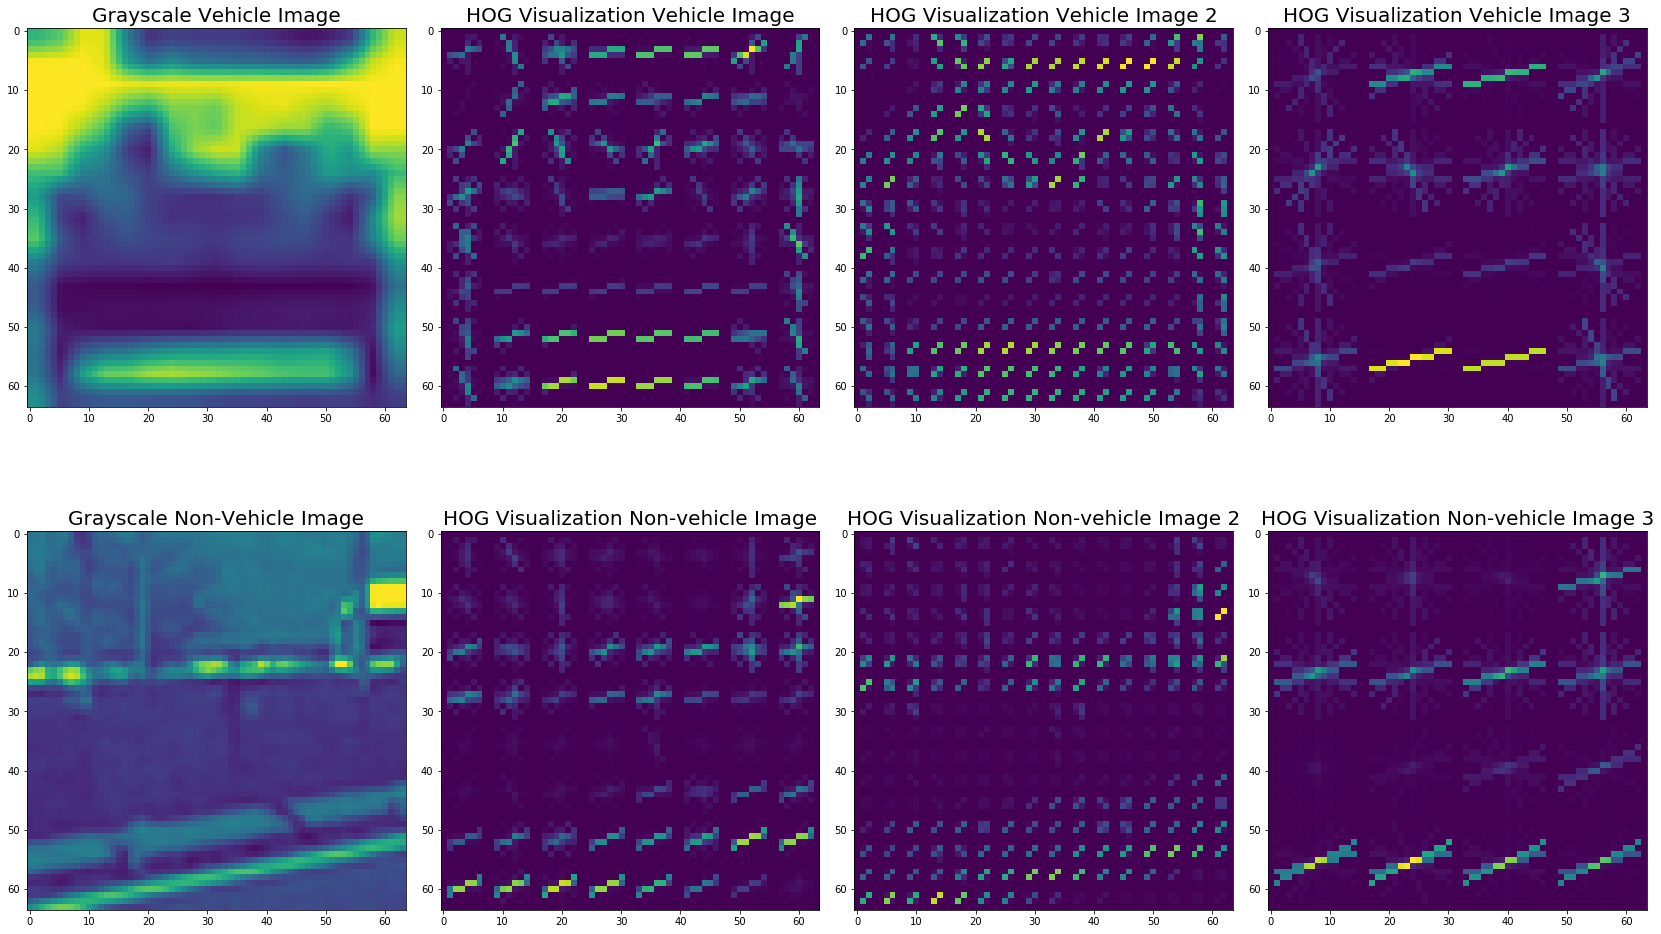

In [10]:
# Plot the examples
f, axs = plt.subplots(2, 4, figsize=(30, 30))
axs = axs.ravel()

axs[0].imshow(gray_vehicle_test)
axs[0].set_title('Grayscale Vehicle Image', fontsize = 20)

axs[1].imshow(hog_image_vehicle)
axs[1].set_title('HOG Visualization Vehicle Image', fontsize = 20)

axs[2].imshow(hog_image_vehicle_2)
axs[2].set_title('HOG Visualization Vehicle Image 2', fontsize = 20)

axs[3].imshow(hog_image_vehicle_3)
axs[3].set_title('HOG Visualization Vehicle Image 3', fontsize = 20)

axs[4].imshow(gray_non_vehicle_test)
axs[4].set_title('Grayscale Non-Vehicle Image', fontsize = 20)

axs[5].imshow(hog_image_non_vehicle)
axs[5].set_title('HOG Visualization Non-vehicle Image', fontsize = 20)

axs[6].imshow(hog_image_non_vehicle_2)
axs[6].set_title('HOG Visualization Non-vehicle Image 2', fontsize = 20)

axs[7].imshow(hog_image_non_vehicle_3)
axs[7].set_title('HOG Visualization Non-vehicle Image 3', fontsize = 20)

f.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85, top=0.85, bottom=0.3)

__Apply spatial binning and color histogram in different color spaces__

__Import libraries__

In [11]:
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

__Import functions__

In [12]:
from helper_functions import extract_features_bin_spatial_hist, plot3d

__Define parameters__

In [13]:
# RGB
color_space = 'RGB'
spatial_size=(32, 32)
hist_bins=32
hist_range=(0, 256)

# HSV
color_space_2 = 'RGB'
spatial_size_2 = (32, 32)
hist_bins_2 = 32
hist_range_2 = (0, 256)

# HLS
color_space_3 = 'HLS'
spatial_size_3 = (32, 32)
hist_bins_3 = 32
hist_range_3 = (0, 256)

# YCrCb
color_space_4 = 'YCrCb'
spatial_size_4 = (32, 32)
hist_bins_4 = 32
hist_range_4 = (0, 256)

__Return spatial binning of color features__

In [14]:
# RGB
features_bin_spatial_hist_vehicle = extract_features_bin_spatial_hist(vehicles_test, color_space, spatial_size,
                        hist_bins, hist_range)

features_bin_spatial_hist_non_vehicle = extract_features_bin_spatial_hist(non_vehicles_test, color_space, spatial_size,
                        hist_bins, hist_range)

# HSV
features_bin_spatial_hist_vehicle_2 = extract_features_bin_spatial_hist(vehicles_test, color_space_2, spatial_size_2,
                        hist_bins_2, hist_range_2)

features_bin_spatial_hist_non_vehicle_2 = extract_features_bin_spatial_hist(non_vehicles_test, color_space_2, spatial_size_2,
                        hist_bins_2, hist_range_2)

# HLS
features_bin_spatial_hist_vehicle_3 = extract_features_bin_spatial_hist(vehicles_test, color_space_3, spatial_size_3,
                        hist_bins_3, hist_range_3)

features_bin_spatial_hist_non_vehicle_3 = extract_features_bin_spatial_hist(non_vehicles_test, color_space_3, spatial_size_3,
                        hist_bins_3, hist_range_3)

# YCrCb
features_bin_spatial_hist_vehicle_4 = extract_features_bin_spatial_hist(vehicles_test, color_space_4, spatial_size_4,
                        hist_bins_4, hist_range_4)

features_bin_spatial_hist_non_vehicle_4 = extract_features_bin_spatial_hist(non_vehicles_test, color_space_4, spatial_size_4,
                        hist_bins_4, hist_range_4)

__Normalize feature vectors__

In [15]:
# RGB
if len(features_bin_spatial_hist_vehicle) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((features_bin_spatial_hist_vehicle, features_bin_spatial_hist_non_vehicle)).astype(np.float64)
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
else: 
    print('Your function only returns empty feature vectors for RGB')
    
# HSV
if len(features_bin_spatial_hist_vehicle_2) > 0:
    # Create an array stack of feature vectors
    X_2 = np.vstack((features_bin_spatial_hist_vehicle_2, features_bin_spatial_hist_non_vehicle_2)).astype(np.float64)
    # Fit a per-column scaler
    X_scaler_2 = StandardScaler().fit(X_2)
    # Apply the scaler to X
    scaled_X_2 = X_scaler_2.transform(X_2)
else: 
    print('Your function only returns empty feature vectors for HSV')
    
# HLS
if len(features_bin_spatial_hist_vehicle_3) > 0:
    # Create an array stack of feature vectors
    X_3 = np.vstack((features_bin_spatial_hist_vehicle_3, features_bin_spatial_hist_non_vehicle_3)).astype(np.float64)
    # Fit a per-column scaler
    X_scaler_3 = StandardScaler().fit(X_3)
    # Apply the scaler to X
    scaled_X_3 = X_scaler_3.transform(X_3)
else: 
    print('Your function only returns empty feature vectors for HLS')
    
# YCrCb
if len(features_bin_spatial_hist_vehicle_4) > 0:
    # Create an array stack of feature vectors
    X_4 = np.vstack((features_bin_spatial_hist_vehicle_4, features_bin_spatial_hist_non_vehicle_4)).astype(np.float64)
    # Fit a per-column scaler
    X_scaler_4 = StandardScaler().fit(X_4)
    # Apply the scaler to X
    scaled_X_4 = X_scaler_4.transform(X_4)
else: 
    print('Your function only returns empty feature vectors for YCrCb')

__Plot images__

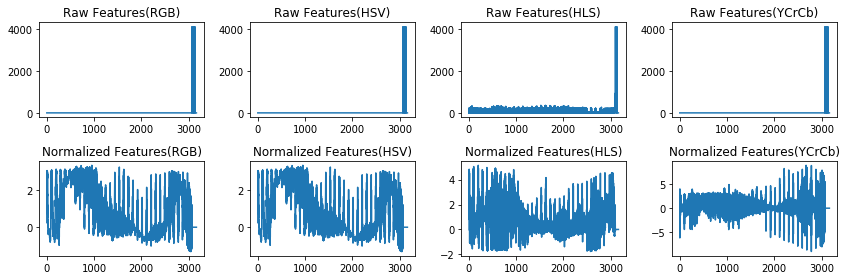

In [16]:
# Plot image

fig = plt.figure(figsize=(12,4))

# RGB
plt.subplot(241)
plt.plot(X[idx_random])
plt.title('Raw Features(RGB)')
plt.subplot(245)
plt.plot(scaled_X[idx_random])
plt.title('Normalized Features(RGB)')

# HSV
plt.subplot(242)
plt.plot(X_2[idx_random])
plt.title('Raw Features(HSV)')
plt.subplot(246)
plt.plot(scaled_X_2[idx_random])
plt.title('Normalized Features(HSV)')

# HLS
plt.subplot(243)
plt.plot(X_3[idx_random])
plt.title('Raw Features(HLS)')
plt.subplot(247)
plt.plot(scaled_X_3[idx_random])
plt.title('Normalized Features(HLS)')

# YCrCb
plt.subplot(244)
plt.plot(X_4[idx_random])
plt.title('Raw Features(YCrCb)')
plt.subplot(248)
plt.plot(scaled_X_4[idx_random])
plt.title('Normalized Features(YCrCb)')

fig.tight_layout()


__Plot image in 3D__

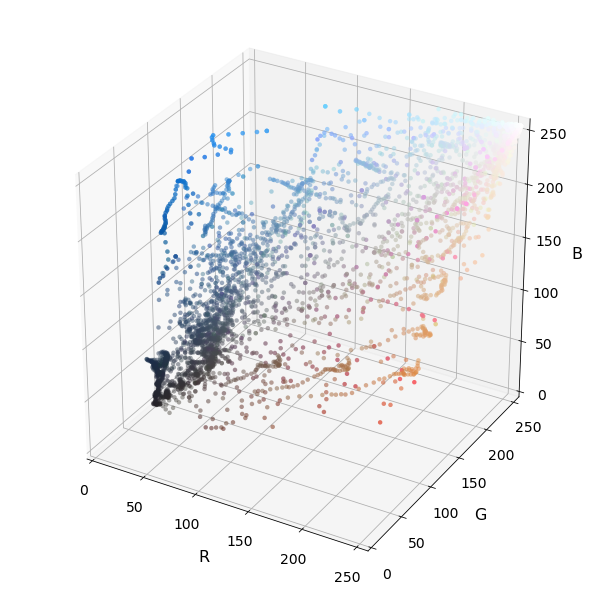

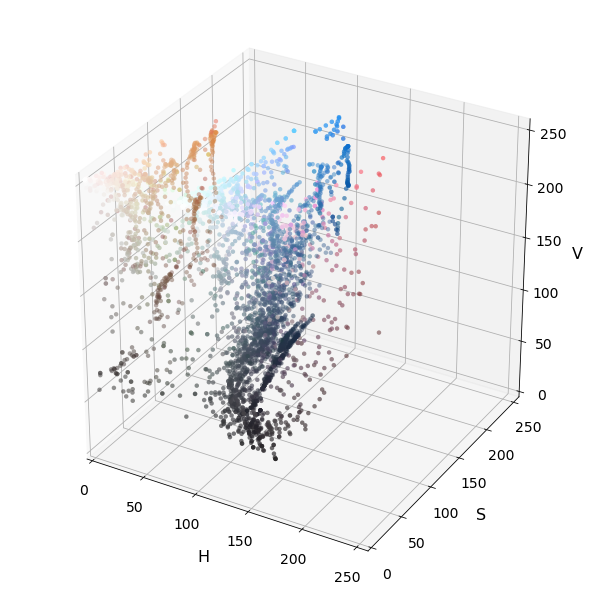

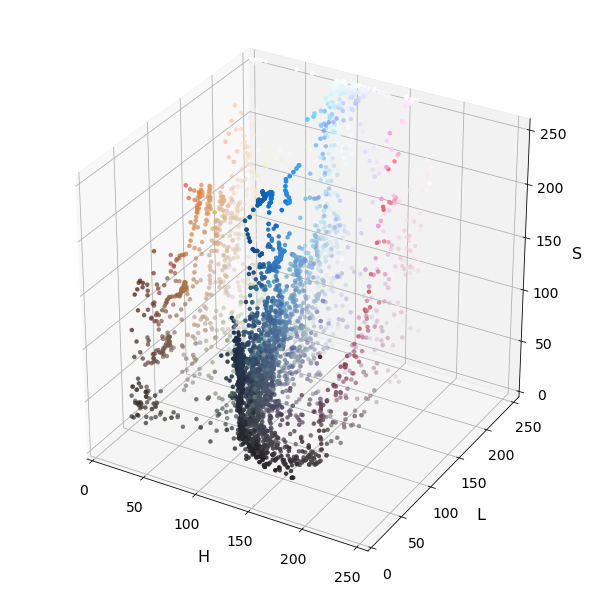

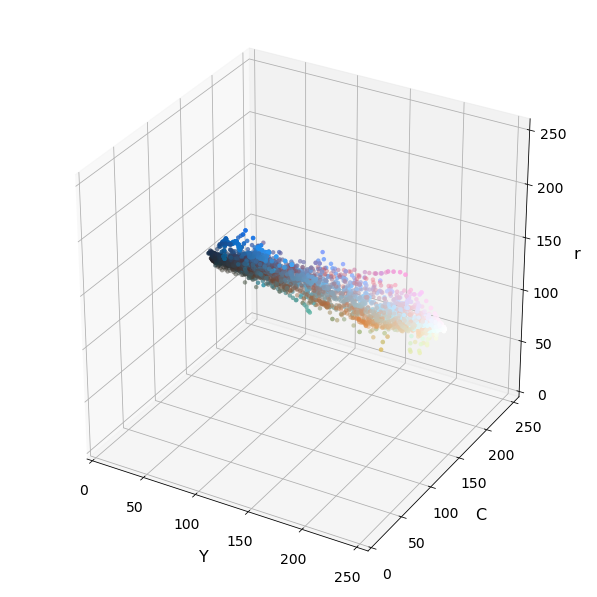

In [17]:
# Read a color image
img = cv2.imread(vehicles_test[idx_random])
#img = cv2.imread("000275.png")
#img = mpimg.imread(vehicles[idx_random])

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
# RGB
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting
# HSV
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
# HLS
img_small_HLS = cv2.cvtColor(img_small, cv2.COLOR_BGR2HLS)
# YCrCb
img_small_YCrCb = cv2.cvtColor(img_small, cv2.COLOR_BGR2YCrCb)


# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
plt.show()

plot3d(img_small_YCrCb, img_small_rgb, axis_labels=list("YCrCb"))
plt.show()

#### 2. Explain how you settled on your final choice of HOG parameters.

I tried various combinations of parameters and came up th following decision with explanation.
The documentation for `hog()` function can be found [here](http://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=feature%20hog#skimage.feature.hog).

* For orientations, either 9 or 17 would be acceptable. I go with `orientation = 9`.
* For pixels_per_cell, smaller number will return more cells. For a 64 by 64 pixels picture, `pix per cell = 8` is good enough.
* For cells per block, either 2 or 4 would be good. I go with `cell_per_block = 2`.
* For visualize, I don't need the image return back in the following cells. Set `False` to it.
* For feature_vector, I need it to be a 1 demensional array for concatenating to other features. Therefore, set `True` to it.
* For multichannel, I am using `HLS` color space with `ALL` channels
___
__Final list__  
orient_final = 9  
pix_per_cell_final = 8  
cell_per_block_final = 2  
vis_final = False  
feature_vec_final = True  
multichannel_final = 'ALL'  


#### 3. Describe how (and identify where in your code) you trained a classifier using your selected HOG features (and color features if you used them).

I trained a linear SVM using the following features:
+ __Color features(spatial binning, color histogram)__  
color_space_final = 'HLS'  
spatial_size_final = (32, 32)  
hist_bins_final = 32  
hist_range_final = (0, 256)  
  
  
+ __HOG features__  
orient_final = 9  
pix_per_cell_final = 8  
cell_per_block_final = 2  
vis_final = False  
feature_vec_final = True  
multichannel_final = 'ALL'  
___
Here are the training steps:
+ Extract the specific features from the dataset
+ Normalie the extracted features vector
+ Define labels vector
+ Split up and randomize on both extracted features vector and labels vector
    - Return training dataset and test dataset
+ Create SVM
+ Fit the training dataset into SVM
+ Evaluate the accuracy of SVM
+ Predict the result with the test dataset
+ Done

__Import libraries__

In [18]:
import time
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split
# But, if you are using scikit-learn >= 0.18 then use this:
# from sklearn.model_selection import train_test_split

C:\Users\ikc\Miniconda3\envs\carnd-term1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


__Import functions__

In [19]:
from helper_functions import extract_features_single_image

__Define parameters__

In [20]:
# Define parameters
color_space_final = 'HLS'  
spatial_size_final = (32, 32)  
hist_bins_final = 32  
hist_range_final = (0, 256)  

orient_final = 9  
pix_per_cell_final = 8  
cell_per_block_final = 2  
vis_final = False # Hardcoded in the function extract_features_single_image()
feature_vec_final = True # Hardcoded in the function extract_features_single_image()
multichannel_final = 'ALL'   # Can be 0, 1, 2, or "ALL"
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

__Extract the specific features from the dataset__

In [21]:
t1=time.time()

# Create a list to append feature vectors to
vehicle_features_all = []
non_vehicle_features_all = []

# Extract features from each images
for vehicle_img_path in vehicles_test:
    # Read in vehicles
    vehicle_image = mpimg.imread(vehicle_img_path)
    # Extract features from image
    single_image_features = extract_features_single_image(vehicle_image, color_space=color_space_final, spatial_size=spatial_size_final, 
                                                          hist_bins=hist_bins_final, hist_range=hist_range_final, orient=orient_final, 
                                                          pix_per_cell=pix_per_cell_final, cell_per_block=cell_per_block_final, hog_channel=multichannel_final, 
                                                          spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)
    # Append the new feature vector to the features list
    vehicle_features_all.append(single_image_features)

t2 = time.time()
print(round(t2-t1, 2), 'Seconds to extract features from vehicle images.')
    
# Extract features from each images
for non_vehicle_img_path in non_vehicles_test:
    # Read in vehicles
    non_vehicle_image = mpimg.imread(non_vehicle_img_path)
    # Extract features from image
    single_image_features = extract_features_single_image(non_vehicle_image, color_space=color_space_final, spatial_size=spatial_size_final, 
                                                          hist_bins=hist_bins_final, hist_range=hist_range_final, orient=orient_final, 
                                                          pix_per_cell=pix_per_cell_final, cell_per_block=cell_per_block_final, hog_channel=multichannel_final, 
                                                          spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)
    # Append the new feature vector to the features list
    non_vehicle_features_all.append(single_image_features)

t3 = time.time()
print(round(t3-t2, 2), 'Seconds to extract features from non-vehicle images.')
    
# features_bin_spatial_hist_vehicle_final = extract_features_bin_spatial_hist(vehicles, 
#                                                                             color_space_final, spatial_size_final, 
#                                                                             hist_bins_final, hist_range_final)

# features_bin_spatial_hist_non_vehicle_final = extract_features_bin_spatial_hist(non_vehicles, 
#                                                                                 color_space_final, spatial_size_final, 
#                                                                                 hist_bins_final, hist_range_final)

# # HOG features
# features_vehicle_final = get_hog_features(gray_vehicle, orient_final,
#                                     pix_per_cell_final, cell_per_block_final,
#                                     vis_final, feature_vec_final)

# features_non_vehicle_final = get_hog_features(gray_non_vehicle, orient_final,
#                                         pix_per_cell_final, cell_per_block_final,
#                                         vis_final, feature_vec_final)


# print("The length of features_bin_spatial_hist_vehicle_final is", len(features_bin_spatial_hist_vehicle_final))
# print("The length of features_bin_spatial_hist_non_vehicle_final is", len(features_bin_spatial_hist_non_vehicle_final))
# print("The length of features_vehicle_final is", len(features_vehicle_final))
# print("The length of features_non_vehicle_final is", len(features_non_vehicle_final))

15.66 Seconds to extract features from vehicle images.
16.01 Seconds to extract features from non-vehicle images.


__Normalie the extracted features vector__

In [22]:
# Normalize
if len(vehicle_features_all) > 0:
    # Create an array stack of feature vectors
    X_final = np.vstack((vehicle_features_all, non_vehicle_features_all)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler_final = StandardScaler().fit(X_final)
    # Apply the scaler to X
    scaled_X_final = X_scaler_final.transform(X_final)
else: 
    print('Your function only returns empty feature vectors for RGB')

__Define labels vector__

In [23]:
# Define the labels vector
y_final = np.hstack((np.ones(len(vehicle_features_all)), 
               np.zeros(len(non_vehicle_features_all))))

__Split up and randomize on both extracted features vector and labels vector__

In [24]:
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X_final, y_final, test_size=0.2, random_state=rand_state)

print('Using spatial binning of:',spatial_size_final,
    'and', hist_bins_final,'histogram bins')
print('Feature vector length:', len(X_train[0]))

Using spatial binning of: (32, 32) and 32 histogram bins
Feature vector length: 5294


__Create SVM__

In [25]:
# Use a linear SVC 
svc = LinearSVC()

__Fit the training dataset into SVM__

In [26]:
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

11.71 Seconds to train SVC...


__Evaluate the accuracy of SVM__

In [27]:
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

Test Accuracy of SVC =  0.8975


__Predict the result with the test dataset__

In [28]:
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

My SVC predicts:  [ 1.  1.  0.  1.  1.  1.  1.  0.  1.  0.]
For these 10 labels:  [ 1.  1.  0.  0.  1.  1.  0.  1.  0.  0.]
0.002 Seconds to predict 10 labels with SVC


### Sliding Window Search

#### 1. Describe how (and identify where in your code) you implemented a sliding window search.  How did you decide what scales to search and how much to overlap windows?

I decided to set search window scale at `(64, 64)` and overlap at `(0.5, 0.5)` based on the experiment below. The code below is used to evaluate the performance of different combination of window scale and overlap value.  
From the final result, I come up the following conclusions:
* Larger overlap will result in more match windows
* Less overlap will result in less match window, nevertheless, not good for the following steps "add heat" and "filter".
* Smaller window will give you more match windows to analyze
* Bigger window will result less overlap, not good for the following steps "add heat" and "filter".

__Import functions__

In [29]:
from helper_functions import slide_window, search_windows, draw_boxes

__Read in test image__

In [30]:
image = mpimg.imread('./test_images/test1.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255

__Define Parameters__

In [31]:
y_max = image.shape[0]
y_start_stop = [np.int(y_max/2), y_max] # Min and max in y to search in slide_window()

# First set
xy_window_1 = (64, 64)
xy_overlap_1 = (0.5, 0.5)

# Second set
xy_window_2 = (64, 64)
xy_overlap_2 = (0.2, 0.2)

# Third set
xy_window_3 = (64, 64)
xy_overlap_3 = (0.8, 0.8)

# Fourth set
xy_window_4 = (32, 32)
xy_overlap_4 = (0.5, 0.5)

# Fifth set
xy_window_5 = (96, 96)
xy_overlap_5 = (0.5, 0.5)

__Search windows__

In [32]:
# First set
windows_1 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=xy_window_1, xy_overlap=xy_overlap_1)

hot_windows_1 = search_windows(image, windows_1, svc, X_scaler_final, color_space=color_space_final, 
                        spatial_size=spatial_size_final, hist_bins=hist_bins_final, 
                        orient=orient_final, pix_per_cell=pix_per_cell_final, 
                        cell_per_block=cell_per_block_final, 
                        hog_channel=multichannel_final, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img_1 = draw_boxes(draw_image, hot_windows_1, color=(0, 0, 255), thick=6)

# Second set
windows_2 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=xy_window_2, xy_overlap=xy_overlap_2)

hot_windows_2 = search_windows(image, windows_2, svc, X_scaler_final, color_space=color_space_final, 
                        spatial_size=spatial_size_final, hist_bins=hist_bins_final, 
                        orient=orient_final, pix_per_cell=pix_per_cell_final, 
                        cell_per_block=cell_per_block_final, 
                        hog_channel=multichannel_final, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img_2 = draw_boxes(draw_image, hot_windows_2, color=(0, 0, 255), thick=6)

# Third set
windows_3 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=xy_window_3, xy_overlap=xy_overlap_3)

hot_windows_3 = search_windows(image, windows_3, svc, X_scaler_final, color_space=color_space_final, 
                        spatial_size=spatial_size_final, hist_bins=hist_bins_final, 
                        orient=orient_final, pix_per_cell=pix_per_cell_final, 
                        cell_per_block=cell_per_block_final, 
                        hog_channel=multichannel_final, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img_3 = draw_boxes(draw_image, hot_windows_3, color=(0, 0, 255), thick=6)

# Fourth set
windows_4 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=xy_window_4, xy_overlap=xy_overlap_4)

hot_windows_4 = search_windows(image, windows_4, svc, X_scaler_final, color_space=color_space_final, 
                        spatial_size=spatial_size_final, hist_bins=hist_bins_final, 
                        orient=orient_final, pix_per_cell=pix_per_cell_final, 
                        cell_per_block=cell_per_block_final, 
                        hog_channel=multichannel_final, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img_4 = draw_boxes(draw_image, hot_windows_4, color=(0, 0, 255), thick=6)

# Fifth set
windows_5 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=xy_window_5, xy_overlap=xy_overlap_5)

hot_windows_5 = search_windows(image, windows_5, svc, X_scaler_final, color_space=color_space_final, 
                        spatial_size=spatial_size_final, hist_bins=hist_bins_final, 
                        orient=orient_final, pix_per_cell=pix_per_cell_final, 
                        cell_per_block=cell_per_block_final, 
                        hog_channel=multichannel_final, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img_5 = draw_boxes(draw_image, hot_windows_5, color=(0, 0, 255), thick=6)


__Plot images__

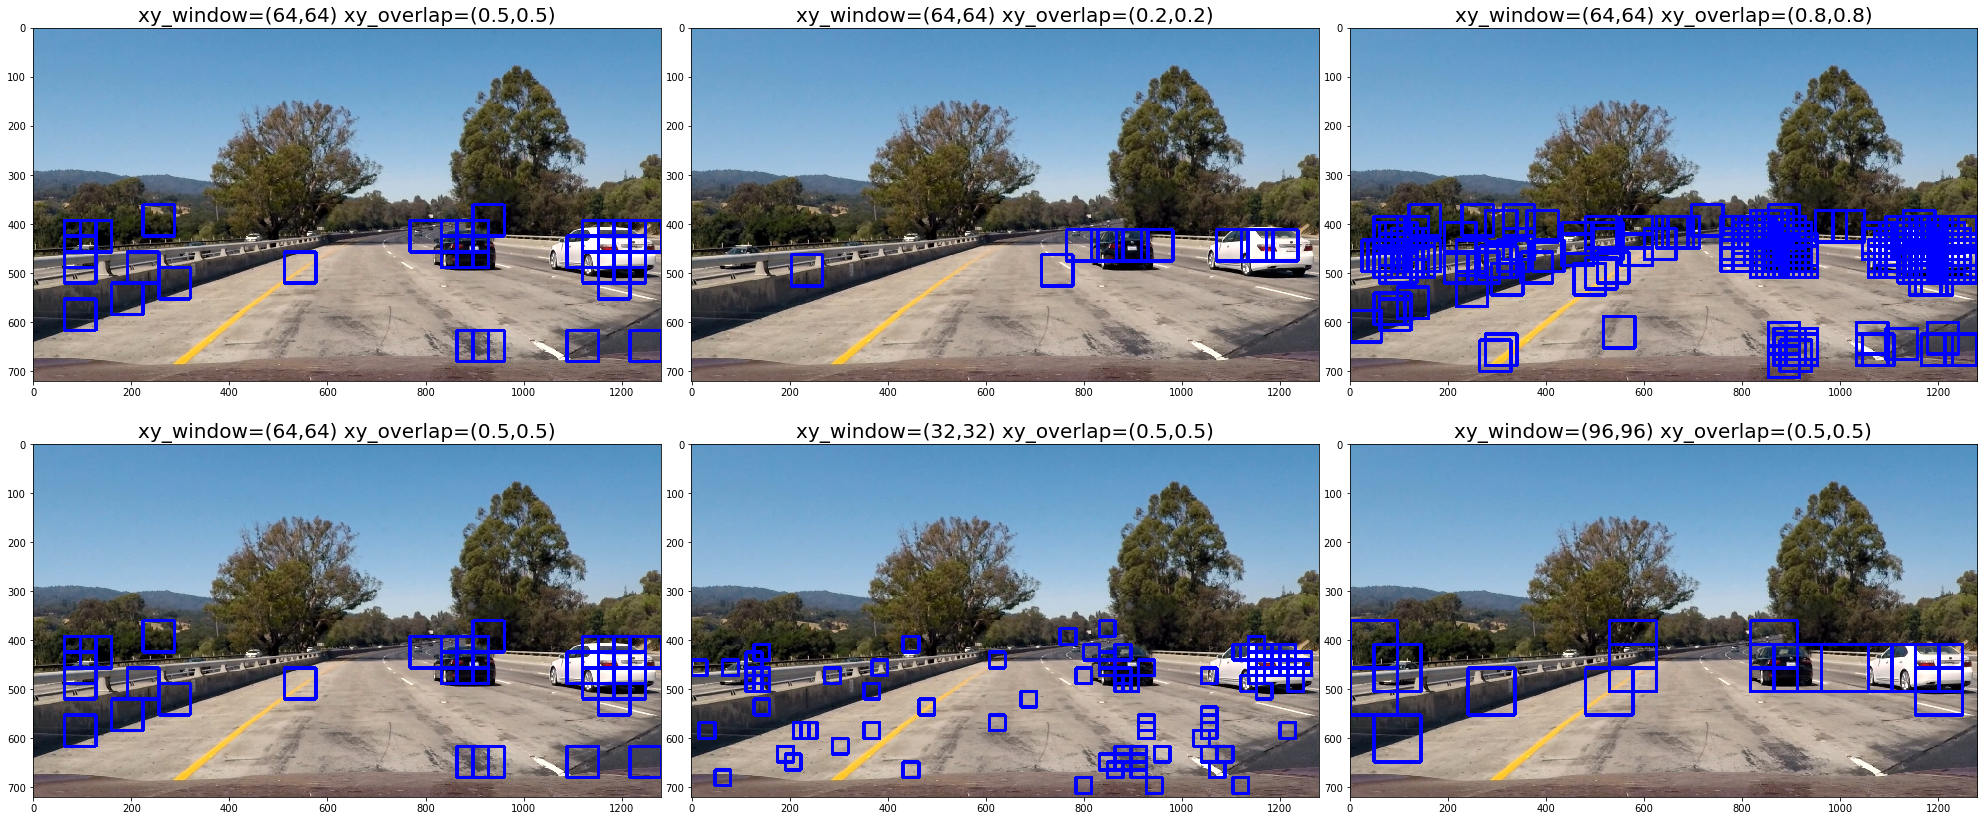

In [33]:
# Plot the examples
f, axs = plt.subplots(2, 3, figsize=(36, 24))
axs = axs.ravel()

axs[0].imshow(window_img_1)
axs[0].set_title('xy_window=(64,64) xy_overlap=(0.5,0.5)', fontsize = 20)

axs[1].imshow(window_img_2)
axs[1].set_title('xy_window=(64,64) xy_overlap=(0.2,0.2)', fontsize = 20)

axs[2].imshow(window_img_3)
axs[2].set_title('xy_window=(64,64) xy_overlap=(0.8,0.8)', fontsize = 20)

axs[3].imshow(window_img_1)
axs[3].set_title('xy_window=(64,64) xy_overlap=(0.5,0.5)', fontsize = 20)

axs[4].imshow(window_img_4)
axs[4].set_title('xy_window=(32,32) xy_overlap=(0.5,0.5)', fontsize = 20)

axs[5].imshow(window_img_5)
axs[5].set_title('xy_window=(96,96) xy_overlap=(0.5,0.5)', fontsize = 20)

f.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85, top=0.85, bottom=0.3)

#### 2. Show some examples of test images to demonstrate how your pipeline is working.  What did you do to optimize the performance of your classifier?

Ultimately I searched on two scales using YCrCb 3-channel HOG features plus spatially binned color and histograms of color in the feature vector, which provided a nice result.  Here are some example images:

![alt text][image4]

__Plot some example images__

### Video Implementation

#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (somewhat wobbly or unstable bounding boxes are ok as long as you are identifying the vehicles most of the time with minimal false positives.)
Here's a [link to my video result](./project_video.mp4)

#### 2. Describe how (and identify where in your code) you implemented some kind of filter for false positives and some method for combining overlapping bounding boxes.

I recorded the positions of positive detections in each frame of the video.  From the positive detections I created a heatmap and then thresholded that map to identify vehicle positions.  I then used `scipy.ndimage.measurements.label()` to identify individual blobs in the heatmap.  I then assumed each blob corresponded to a vehicle.  I constructed bounding boxes to cover the area of each blob detected.  

Here's an example result showing the heatmap from a series of frames of video, the result of `scipy.ndimage.measurements.label()` and the bounding boxes then overlaid on the last frame of video:

### Here are six frames and their corresponding heatmaps:

![alt text][image5]

### Here is the output of `scipy.ndimage.measurements.label()` on the integrated heatmap from all six frames:
![alt text][image6]

### Here the resulting bounding boxes are drawn onto the last frame in the series:
![alt text][image7]

### Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

Here I'll talk about the approach I took, what techniques I used, what worked and why, where the pipeline might fail and how I might improve it if I were going to pursue this project further. 